
# **Problem Statement**:


---


The e-commerce industry faces challenges in ensuring timely and efficient delivery of products to customers. This can lead to customer dissatisfaction, increased costs, and potential loss of revenue. Analyzing delivery analytics data can help identify bottlenecks and areas for improvement within the delivery process.

This project aims to leverage the '**Ecommerce_Delivery_Analytics_New.csv**' dataset to identify key factors affecting delivery performance and develop insights that can help e-commerce businesses optimize their delivery operations and enhance customer satisfaction.


# sources

---

https://www.kaggle.com/datasets/logiccraftbyhimanshi/e-commerce-analytics-swiggy-zomato-blinkit/data


# **Main Goal**:

---


 Analyze e-commerce delivery data to optimize delivery operations and enhance customer satisfaction.

This concisely captures the essence of the project's objective. It focuses on the core actions (analyze and optimize) and the desired outcome (customer satisfaction).

# **Key Features**

---



Order ID : Unique identifier for each order

Platform : The e-commerce platform (Blinkit, Swiggy Instamart, JioMart)

Order Date & Time : Timestamp of when the order was placed

Delivery Time (Minutes) : Time taken for order delivery

Customer Feedback : Text-based feedback provided by the customer

Service Rating (1-5) : Customer rating for delivery service

Delivery Distance (km) : Distance covered by the delivery agent

Payment Method : Mode of payment (Cash, UPI, Card, Wallet)

Order Value (INR) : Total value of the order in Indian Rupees

Discount Applied (INR) : Discount provided on the order

Delivery Charges (INR) : Charges applied for delivery

Order Status : (Delivered, Cancelled, Delayed, etc.)

# **Target Variable:** **"Delivery Performance"**


---


**Reasoning:** The project aims to analyze and optimize delivery operations. This suggests a focus on improving some aspect of how well deliveries are performed.

Possible Candidates:

* Delivery Time
* On-Time Delivery Rate
* Customer Satisfaction Score
* Delivery Cost

To confirm, examine the dataset, review project requirements, or consult with domain experts.

# Step1 : Understanding the data

In [ ]:
#importing necessary libraries:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
# Loading dataset
df=pd.read_csv('/content/Ecommerce_Delivery_Analytics_team7.csv')

In [ ]:
# Preview the first few rows of the dataset
df.head()

,Order ID,Customer ID,Platform,Ordered Time,Delivery Time (Minutes),Product Category,Order Value (INR),Customer Feedback,Service Rating,Delivery Delay,Refund Requested,Unnamed: 11,Unnamed: 12,Unnamed: 13
0,ORD000001,CUST2824,JioMart,12:19:30 AM,30.0,Fruits & Vegetables,382,"Fast delivery, great service!",5,No,No,NaN,NaN,NaN
1,ORD000002,CUST1409,Blinkit,12:54:30 AM,16.0,Dairy,279,Quick and reliable!,5,No,No,NaN,NaN,NaN
2,ORD000003,CUST5506,JioMart,12:21:29 AM,25.0,Beverages,599,Items missing from order.,2,No,Yes,NaN,NaN,NaN
3,ORD000004,CUST5012,JioMart,12:19:30 AM,42.0,Beverages,946,Items missing from order.,2,Yes,Yes,NaN,NaN,NaN
4,ORD000005,CUST4657,Blinkit,12:49:30 AM,30.0,Beverages,334,"Fast delivery, great service!",5,No,No,NaN,NaN,NaN


In [ ]:
# Preview the last few rows of the dataset
df.tail()

,Order ID,Customer ID,Platform,Ordered Time,Delivery Time (Minutes),Product Category,Order Value (INR),Customer Feedback,Service Rating,Delivery Delay,Refund Requested,Unnamed: 11,Unnamed: 12,Unnamed: 13
99995,ORD099996,CUST5324,JioMart,12:49:30 AM,24.0,Dairy,289,Packaging could be better.,3,No,No,NaN,NaN,NaN
99996,ORD099997,CUST1677,JioMart,12:18:30 AM,19.0,Snacks,322,Good quality products.,4,No,No,NaN,NaN,NaN
99997,ORD099998,CUST8198,JioMart,12:27:29 AM,41.0,Dairy,135,"Fast delivery, great service!",5,Yes,No,NaN,NaN,NaN
99998,ORD099999,CUST9975,JioMart,12:14:29 AM,31.0,Grocery,973,Quick and reliable!,5,No,No,NaN,NaN,NaN
99999,ORD100000,CUST3748,JioMart,12:41:30 AM,34.0,Fruits & Vegetables,453,Packaging could be better.,3,No,No,NaN,NaN,NaN


In [ ]:
# Preview the some random rows of the dataset
df.sample(10)

,Order ID,Customer ID,Platform,Ordered Time,Delivery Time (Minutes),Product Category,Order Value (INR),Customer Feedback,Service Rating,Delivery Delay,Refund Requested,Unnamed: 11,Unnamed: 12,Unnamed: 13
83057,ORD083058,CUST7078,Blinkit,12:29:30 AM,49.0,Beverages,734,"Not fresh, disappointed.",2,Yes,Yes,NaN,NaN,NaN
4968,ORD004969,CUST3931,JioMart,12:12:30 AM,13.0,Grocery,270,Items missing from order.,2,No,Yes,NaN,NaN,NaN
96601,ORD096602,CUST8453,JioMart,12:27:29 AM,25.0,Dairy,726,Items missing from order.,2,No,Yes,NaN,NaN,NaN
71623,ORD071624,CUST6776,Blinkit,12:22:30 AM,42.0,Snacks,481,Good quality products.,4,Yes,No,NaN,NaN,NaN
89773,ORD089774,CUST1159,JioMart,12:29:30 AM,37.0,Fruits & Vegetables,378,Quick and reliable!,5,No,No,NaN,NaN,NaN
30206,ORD030207,CUST4363,Blinkit,12:07:30 AM,48.0,Grocery,1373,"Easy to order, loved it!",5,Yes,No,NaN,NaN,NaN
15298,ORD015299,CUST8744,Blinkit,12:14:29 AM,32.0,Beverages,777,"Horrible experience, never ordering again.",1,No,Yes,NaN,NaN,NaN
16711,ORD016712,CUST4668,JioMart,12:07:30 AM,51.0,Dairy,587,"Fast delivery, great service!",5,Yes,No,NaN,NaN,NaN
39466,ORD039467,CUST3465,JioMart,12:18:30 AM,15.0,Snacks,161,Wrong item delivered.,1,No,Yes,NaN,NaN,NaN
2304,ORD002305,CUST1990,Blinkit,12:10:30 AM,41.0,Personal Care,1948,"Easy to order, loved it!",5,Yes,No,NaN,NaN,NaN


In [ ]:
#Columns
df.columns

Index(['Order ID', 'Customer ID', 'Platform', 'Ordered Time',
       'Delivery Time (Minutes)', 'Product Category', 'Order Value (INR)',
       'Customer Feedback', 'Service Rating', 'Delivery Delay',
       'Refund Requested', 'Unnamed: 11', 'Unnamed: 12', 'Unnamed: 13'],
      dtype='object')

In [ ]:
# Checking data types and non-null values
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 14 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   Order ID                 100000 non-null  object 
 1   Customer ID              100000 non-null  object 
 2   Platform                 100000 non-null  object 
 3   Ordered Time             100000 non-null  object 
 4   Delivery Time (Minutes)  100000 non-null  float64
 5   Product Category         100000 non-null  object 
 6   Order Value (INR)        100000 non-null  int64  
 7   Customer Feedback        100000 non-null  object 
 8   Service Rating           100000 non-null  int64  
 9   Delivery Delay           100000 non-null  object 
 10  Refund Requested         100000 non-null  object 
 11  Unnamed: 11              0 non-null       float64
 12  Unnamed: 12              0 non-null       float64
 13  Unnamed: 13              0 non-null       float64
dtypes: fl

In [ ]:
# rows and columns
df.shape

(100000, 14)

In [ ]:
#summary of the  categorical columns
df.describe(include='object')

,Order ID,Customer ID,Platform,Ordered Time,Product Category,Customer Feedback,Delivery Delay,Refund Requested
count,100000,100000,100000,100000,100000,100000,100000,100000
unique,100000,9000,3,60,6,13,2,2
top,ORD000001,CUST8779,Swiggy Instamart,12:50:30 AM,Dairy,"Easy to order, loved it!",No,No
freq,1,26,33449,1755,16857,7791,86328,54181


In [ ]:
#summary of the  numerical columns
df.describe()

,Delivery Time (Minutes),Order Value (INR),Service Rating,Unnamed: 11,Unnamed: 12,Unnamed: 13
count,100000.000000,100000.000000,100000.000000,0.0,0.0,0.0
mean,29.536140,590.994400,3.240790,NaN,NaN,NaN
std,9.958933,417.409058,1.575962,NaN,NaN,NaN
min,5.000000,50.000000,1.000000,NaN,NaN,NaN
25%,23.000000,283.000000,2.000000,NaN,NaN,NaN
50%,30.000000,481.000000,3.000000,NaN,NaN,NaN
75%,36.000000,770.000000,5.000000,NaN,NaN,NaN
max,76.000000,2000.000000,5.000000,NaN,NaN,NaN


# Data Cleaning

In [ ]:
#Droped unwanted features
df.drop('Unnamed: 11',axis=1,inplace=True)
df.drop('Unnamed: 12',axis=1,inplace=True)
df.drop('Unnamed: 13',axis=1,inplace=True)

In [ ]:
#displays the total number of missing values
df.isnull().sum()

,0
Order ID,0
Customer ID,0
Platform,0
Ordered Time,0
Delivery Time (Minutes),0
Product Category,0
Order Value (INR),0
Customer Feedback,0
Service Rating,0
Delivery Delay,0


In [ ]:
#checking duplicates
df.duplicated().sum()

0

# **visualization**

# **Comparison of Delivery Time Across Product Categories and Platforms**

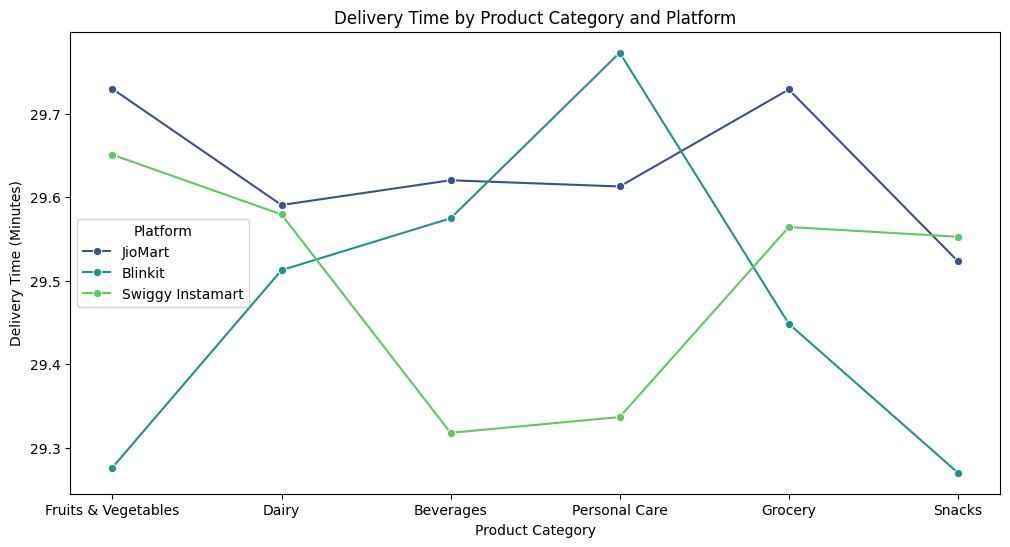

In [ ]:
plt.figure(figsize=(12, 6))
sns.lineplot(x='Product Category', y='Delivery Time (Minutes)', hue='Platform', data=df, errorbar=None, marker='o', palette='viridis')  # Added palette
plt.title('Delivery Time by Product Category and Platform')
plt.show()

### **Key Observations from Delivery Time by Product Category and Platform Chart**  

1. **Variation in Delivery Time Across Platforms:**  
   - JioMart generally has **higher delivery times**, especially for **Personal Care and Grocery items**.  
   - Blinkit shows **more fluctuation**, with the highest delivery time for **Personal Care**.  
   - Swiggy Instamart has a **more stable trend**, delivering consistently faster for most categories.  

2. **Product Category Impact:**  
   - **Personal Care** takes the longest to deliver across all platforms.  
   - **Beverages and Snacks** have the **shortest delivery times**, indicating efficient handling and stocking.  

3. **Performance Insights:**  
   - Swiggy Instamart appears to be the **fastest platform** on average.  
   - JioMart’s performance varies, indicating **potential inefficiencies** in logistics.  
   - Blinkit struggles with **Personal Care**, possibly due to **stock availability or delivery logistics**.  

### **Recommendations:**  
- **Optimize Personal Care deliveries** to reduce delays.  
- **Improve JioMart’s logistics** to enhance delivery speed.  
- **Analyze warehouse efficiency** to maintain quick fulfillment across categories.

# **Distribution of Delivery Time**

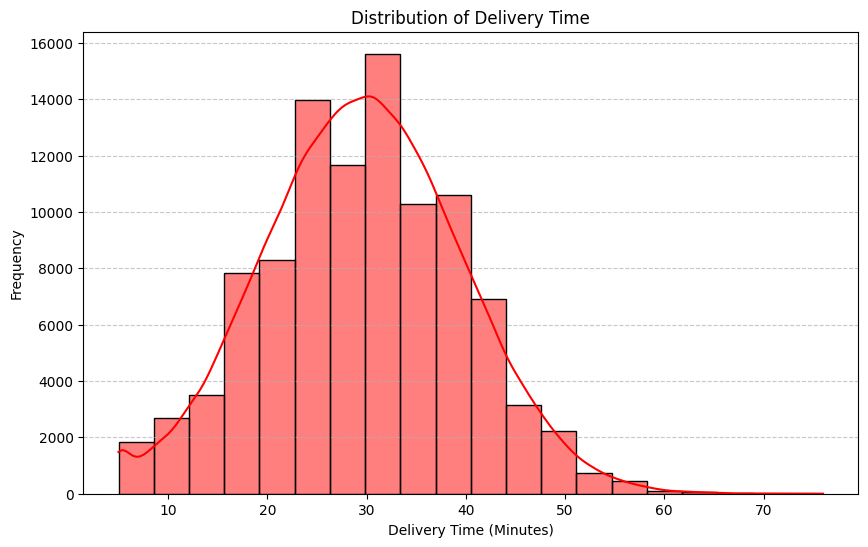

In [ ]:
# Plot histogram
plt.figure(figsize=(10, 6))
sns.histplot(df['Delivery Time (Minutes)'], bins=20, kde=True, color='red')
plt.xlabel("Delivery Time (Minutes)")
plt.ylabel("Frequency")
plt.title("Distribution of Delivery Time")
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()


**Skewed Distribution:** The histogram shows a right-skewed (positively skewed) distribution, indicating that most delivery times are concentrated around a central range, but some deliveries take significantly longer.

**Peak Delivery Time:** The highest frequency of deliveries falls within the 25-35 minute range, suggesting that most orders are completed in this timeframe.

 **Long Tail:** There are fewer instances of very short or very long delivery times, but outliers extend up to around 70+ minutes.

**Smooth Density Curve:** The KDE (Kernel Density Estimate) overlay confirms the unimodal nature of delivery times, peaking around the 30-minute mark.

# **Delivery Time Distribution Across Platforms**

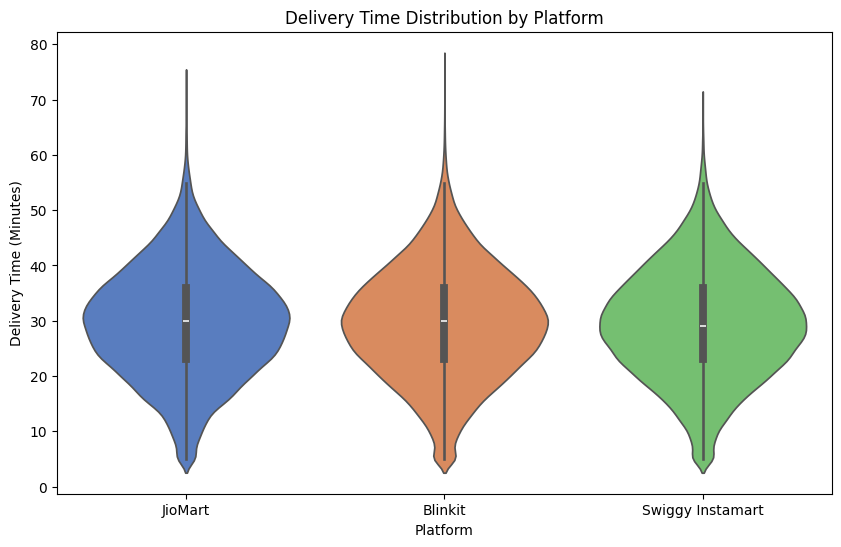

In [ ]:
# Plot violin chart
plt.figure(figsize=(10, 6))
sns.violinplot(x=df['Platform'], y=df['Delivery Time (Minutes)'],hue=df['Platform'], palette="muted")

plt.xlabel("Platform")
plt.ylabel("Delivery Time (Minutes)")
plt.title("Delivery Time Distribution by Platform")
plt.show()


**Delivery Time Spread**:  
   - All three platforms (JioMart, Blinkit, and Swiggy Instamart) show a wide distribution of delivery times, indicating variability in performance.  
   - The delivery time generally ranges from around 5 minutes to over 70 minutes, but most deliveries are concentrated in a narrower range.

**Comparison Across Platforms**:  
   - JioMart and Blinkit have slightly wider distributions, suggesting more fluctuations in their delivery times.  
   - Swiggy Instamart seems to have a more concentrated distribution around the median, which may indicate more consistent delivery times.  

**Median and Density**:  
   - The bulk of delivery times for all platforms is centered around **20-35 minutes**, meaning most deliveries are completed within this range.  
   - There are some extreme outliers (above 60 minutes), indicating occasional delays in the service.

This visualization helps assess platform efficiency and identify potential areas for improvement in delivery consistency.

# **Comparison of Order Distribution Across Grocery Delivery Platforms**

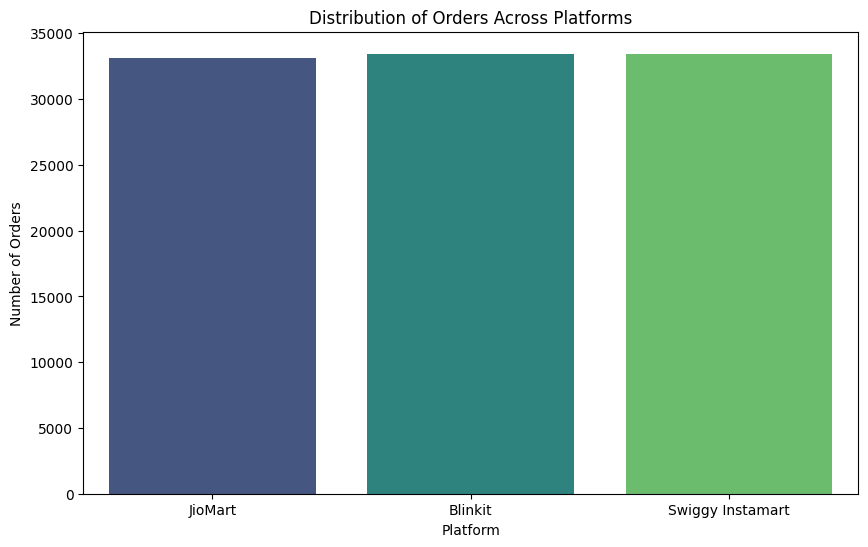

In [ ]:
# Assuming 'df' is your DataFrame and 'Platform' is the column you want to analyze
plt.figure(figsize=(10, 6))  # Adjust figure size if needed
sns.countplot(x='Platform',hue='Platform', data=df, palette='viridis')  # Use palette for color customization
plt.title('Distribution of Orders Across Platforms')
plt.xlabel('Platform')
plt.ylabel('Number of Orders')
plt.show()

The bar chart shows the **number of orders placed across three online grocery platforms: JioMart, Blinkit, and Swiggy Instamart**. Below are the key insights from the visualization:  

**Similar Order Volumes Across Platforms**  
- The number of orders across **JioMart, Blinkit, and Swiggy Instamart is nearly equal**, with only **minor variations**.  
- This indicates **strong competition** among the platforms, as no single platform dominates in order volume.  
- It suggests that customers are likely to **switch between platforms based on availability, pricing, discounts, or delivery speed**.  

**Balanced Market Presence**  
- Since no platform has a **significant lead in order count**, it suggests a **well-distributed market share** among the three services.  
- This means that **each platform is effectively reaching and engaging customers**, possibly due to competitive pricing, service quality, or brand loyalty.

**Competitive Market Conditions**  
- The even distribution highlights that **customers do not have a strong preference for one platform over another**.  
- Factors such as **delivery efficiency, discounts, and product availability** could be driving customer choices rather than platform exclusivity.  

**Recommendations**  
- **Platforms should focus on differentiation** to attract more customers, such as **faster delivery, better pricing strategies, or improved customer service**.  
- **Personalized offers and loyalty programs** could help platforms retain customers and increase order volume.  
- Analyzing order trends across different **regions and time periods** could help platforms optimize their operations and capture a larger market share.  

Overall, the data suggests that the grocery delivery market is **highly competitive**, and platforms need to focus on **enhanced customer experience and efficiency** to gain a strategic advantage.

# **Distribution of Orders Across Product Categories and Platforms**

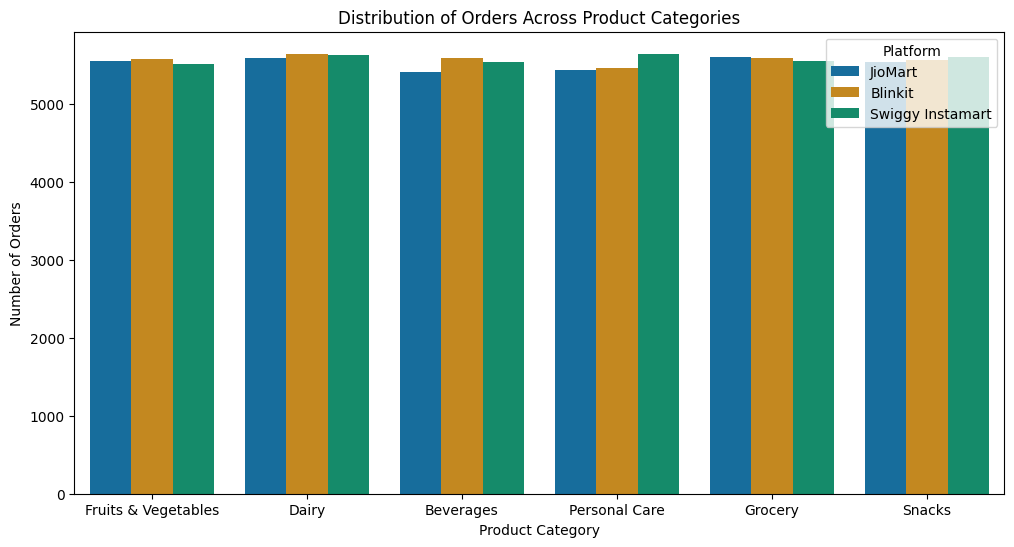

In [ ]:
plt.figure(figsize=(12, 6))  # Adjust figure size if needed
sns.countplot(x='Product Category',hue='Platform',data=df, palette='colorblind')
plt.title('Distribution of Orders Across Product Categories')
plt.xlabel('Product Category')
plt.ylabel('Number of Orders')
plt.show()


**Balanced Order Distribution:**  
   - The number of orders is relatively **evenly distributed across all product categories**.  
   - No category shows a drastic increase or decrease in orders.  

**Platform-Specific Variations:**  
   - **Blinkit and Swiggy Instamart have slightly higher orders** in most categories compared to JioMart.  
   - **Beverages and Personal Care categories** have a higher number of orders on Blinkit compared to JioMart.  

**High Order Volume in Grocery & Dairy:**  

   - Grocery and Dairy products consistently receive **high order volumes** across all platforms.  
   - These categories are essential and frequently purchased items.  

**Competitive Performance Among Platforms:**  
   - All three platforms have **similar order distributions**, indicating strong competition in the online delivery market.  

**Insights:**  

- **Grocery and Dairy** categories are the most demanded.  
- Blinkit and Swiggy Instamart slightly outperform JioMart in order volume.  
- **No major dominance** by a single platform, suggesting **customer preferences are divided** among all three services.

# **Analysis of Delivery Time Trends and Optimization Insights**

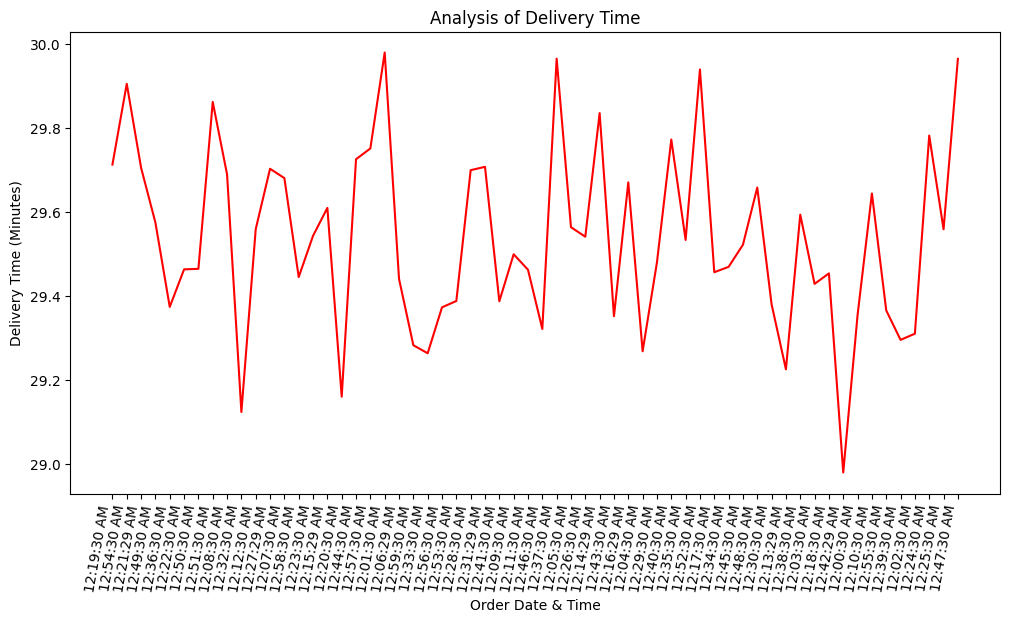

In [ ]:
# Lineplot
plt.figure(figsize=(12, 6))
sns.lineplot(x='Ordered Time' , y='Delivery Time (Minutes)', data=df, color='red', errorbar=None)
plt.title('Analysis of Delivery Time')
plt.xlabel('Order Date & Time')
plt.ylabel('Delivery Time (Minutes)')
plt.xticks(rotation=80, ha='right')
plt.show()

**Fluctuating Delivery Time:** The graph shows frequent ups and downs, suggesting inconsistencies in the delivery process.  

 **Stable Range:** Delivery times mostly stay between **29.0 to 30.0 minutes**, indicating a generally reliable service with minor inefficiencies.  

 **No Clear Trend:** There is no strong upward or downward pattern, meaning the service neither improves nor worsens significantly over time.

 **Occasional Peaks:** Some spikes indicate possible **traffic delays, high order volumes, or operational slowdowns** at certain times.  

**Recommendations for Improvement**  
- Identify **peak delay periods** and adjust delivery resources accordingly.  
- **Use AI-driven route optimization** to reduce delays due to traffic.  
- Enhance **warehouse efficiency** to minimize dispatch time.  
- Monitor and **analyze order trends** to allocate resources effectively.  


# Order Distribution by E-Commerce Platform and Product Category

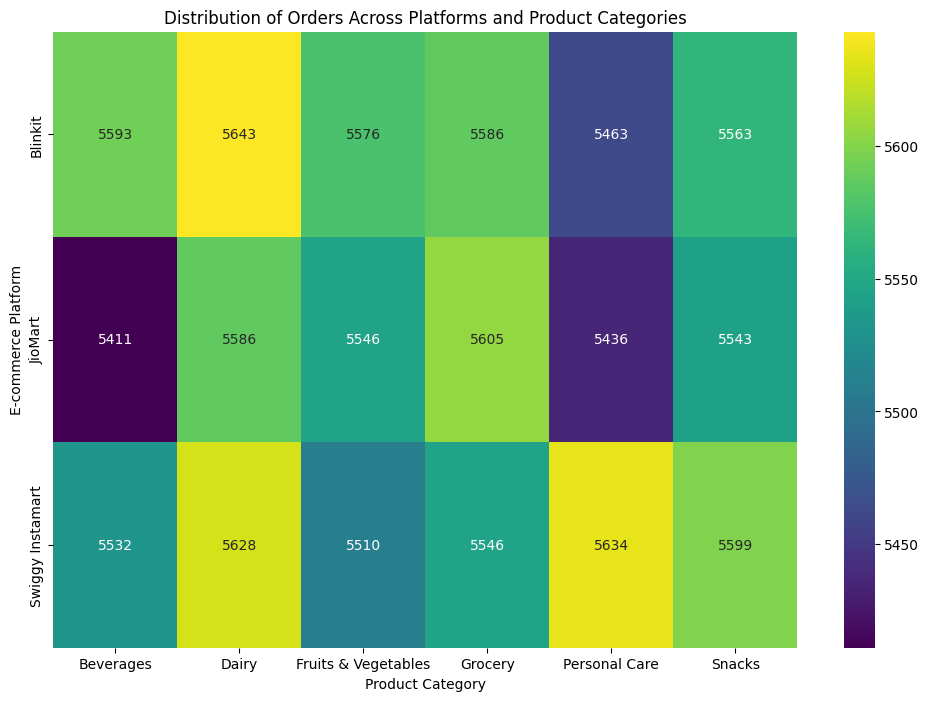

In [ ]:
# Assuming 'df' is your DataFrame
heatmap_data = pd.pivot_table(df, values='Order ID', index='Platform', columns='Product Category', aggfunc='count', fill_value=0)
plt.subplots(figsize=(12, 8))
# Create the heatmap
sns.heatmap(heatmap_data, annot=True, cmap='viridis', fmt='d')
plt.xlabel("Product Category")
plt.ylabel("E-commerce Platform")
plt.title("Distribution of Orders Across Platforms and Product Categories")
plt.show()

The heatmap displays the distribution of orders across different e-commerce platforms (Blinkit, JioMart, and Swiggy Instamart) for various product categories

**Observations:**

Blinkit generally has the highest order counts across most categories, particularly in Dairy (5643).

JioMart shows a competitive count in Grocery (5605), indicating strong performance in that category.

Swiggy Instamart maintains a good order count, especially in Snacks (5599) and Dairy (5628), but it generally has lower counts than Blinkit and JioMart in several categories.

**Insights:**

Dairy products are popular across all platforms, with Blinkit leading in that category.

Grocery sees a strong count in JioMart, showing its effectiveness in that segment.

# Delivery Delay Analysis Across Platforms

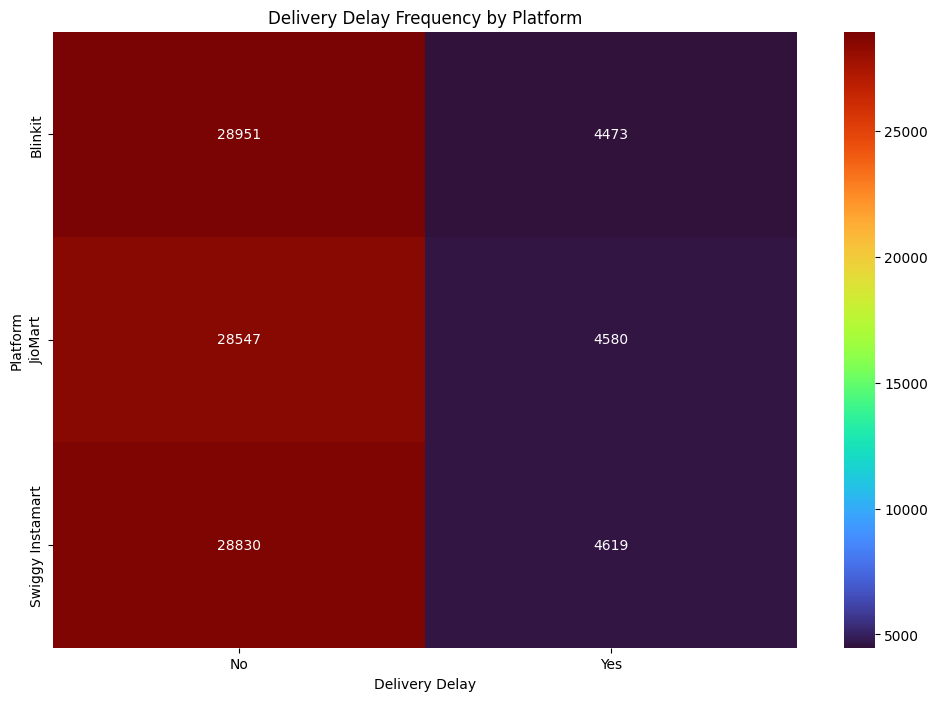

In [ ]:
# Create a cross-tabulation (contingency table)
corsstab_Delivery_Delay = pd.crosstab(df['Platform'], df['Delivery Delay'])
# Create the heatmap
plt.subplots(figsize=(12, 8))
sns.heatmap(corsstab_Delivery_Delay, annot=True, cmap='turbo', fmt='d')
plt.title("Delivery Delay Frequency by Platform")
plt.ylabel("Platform")
plt.show()

**Low Delivery Delay Rate**: Across all three platforms (Blinkit, JioMart, and Swiggy Instamart), the majority of deliveries were not delayed. The counts for "No Delay" are significantly higher than for "Yes Delay".

**Similar Delay Patterns Across Platforms**: The number of delayed orders is relatively consistent across platforms, with Blinkit (4,473), JioMart (4,580), and Swiggy Instamart (4,619) showing only minor differences.

**Highest No Delay Orders**: Blinkit recorded the highest number of "No Delay" orders (28,951), followed by Swiggy Instamart (28,830) and JioMart (28,547).

**Visual Insight from Color Map**: The dark red sections represent high-frequency "No Delay" orders, while the darker shades in the "Yes Delay" column indicate a much lower frequency.

**Performance Comparison**: Since all three platforms have a similar number of delayed deliveries, it suggests that external factors (e.g., traffic, weather) might influence delays rather than platform inefficiencies alone.

# **Refund Requested Frequency by Platform**

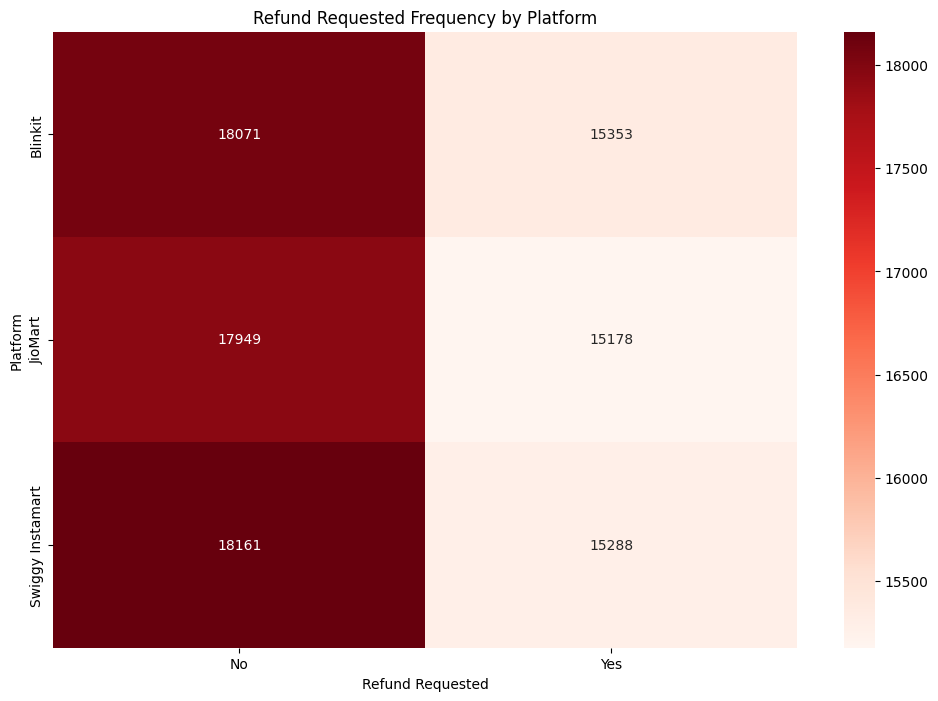

In [ ]:
# Create a cross-tabulation (contingency table)
corsstab_Refund_Requested = pd.crosstab(df['Platform'], df['Refund Requested'])
# Create the heatmap
plt.subplots(figsize=(12, 8))
sns.heatmap(corsstab_Refund_Requested, annot=True, cmap='Reds', fmt='d')
plt.title("Refund Requested Frequency by Platform") # Corrected title
plt.ylabel("Platform")
plt.xlabel("Refund Requested") # Added x-axis label
plt.show()

**Similar Distribution Across Platforms**  
   - The number of refund requests is fairly similar across Blinkit, JioMart, and Swiggy Instamart.  
   - Each platform has around **15,000+ refund requests** and **18,000+ non-refund cases**.  

**Swiggy Instamart Has the Highest 'No' Count**  
   - Swiggy Instamart has the highest number of non-refund cases at **18,161**, slightly above Blinkit and JioMart.  

**JioMart Has the Lowest 'Yes' Count**  
   - JioMart has the **lowest refund request count (15,178)** compared to Blinkit and Swiggy Instamart.  

**Even Split Between Refunds and Non-Refunds**  
   - The difference between refund requests ('Yes') and non-refund cases ('No') is not extreme across platforms.  

This suggests that **refund rates are quite balanced across all three platforms**, with no platform showing significantly higher refund issues.

# **Delivery Time Distribution Analysis by Platform**

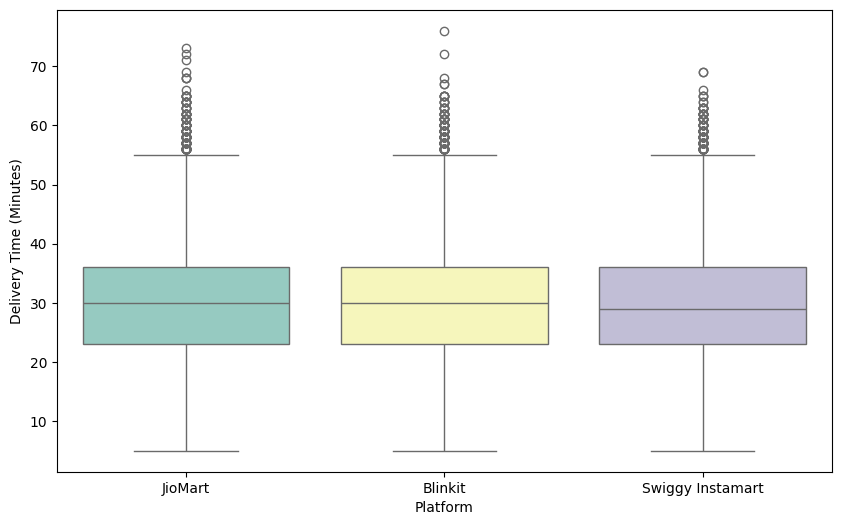

In [ ]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='Platform', y='Delivery Time (Minutes)',hue='Platform', data=df, palette='Set3')
plt.xlabel('Platform')
plt.ylabel('Delivery Time (Minutes)')
plt.show()

Key Observations from the Boxplot:

**Median Delivery Time:**

* The median delivery time for all three platforms (JioMart, Blinkit, and Swiggy Instamart) appears to be quite similar, around 30 minutes.

**Interquartile Range (IQR):**

* The IQR (25th to 75th percentile) is also similar across platforms, indicating that most deliveries fall within a comparable time range.

* Most deliveries take between 20 to 40 minutes.

**Outliers Present:**

* All platforms have outliers (represented as dots), showing that in some cases, delivery times exceed 60+ minutes.

* These could be due to factors like high demand, traffic, or operational inefficiencies.

**Consistency Across Platforms:**

* There’s no significant difference between the platforms in terms of delivery time distribution.
* This suggests that external conditions (rather than platform-specific inefficiencies) might be influencing delays.

# Service Rating Distribution Analysis for Swiggy Instamart

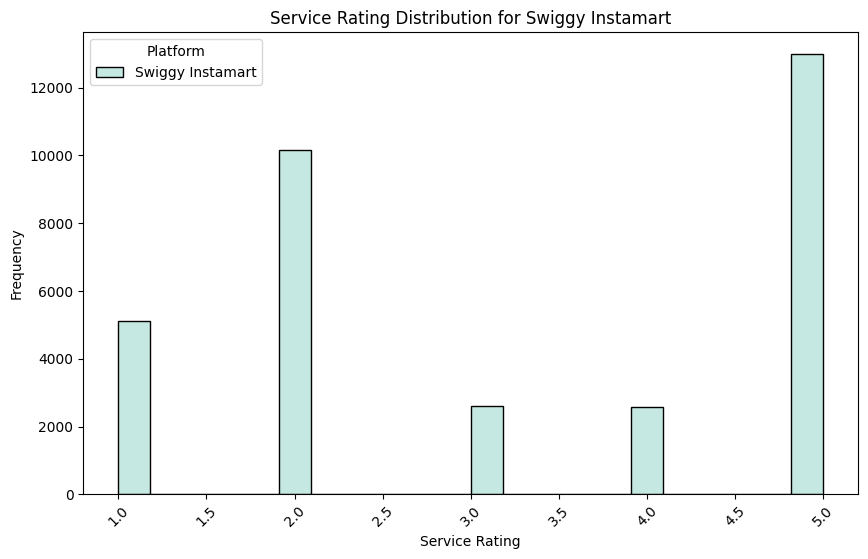

In [ ]:
platform_name = "Swiggy Instamart"  # Replace with the desired platform
# Filter the data for the chosen platform
platform_data = df[df['Platform'] == platform_name]
plt.figure(figsize=(10, 6))
# Use platform_data as the primary data source
sns.histplot(x='Service Rating', hue='Platform', data=platform_data, palette='Set3')
plt.title(f'Service Rating Distribution for {platform_name}')
plt.xlabel('Service Rating')
plt.ylabel('Frequency')
plt.xticks(rotation=45)
plt.show()

 **Bimodal Distribution**:  
   - The service ratings show a **bimodal pattern**, with **peaks at ratings 2 and 5**.  
   - This suggests that users either had a **very good experience (5-star)** or a **poor experience (2-star)**, with fewer ratings in between.  

**Highest Frequency at 5 Stars**:  
   - The most common rating is **5 stars**, with over **12,000 reviews**, indicating that many users are satisfied with Swiggy Instamart's service.  

**Significant 2-Star Ratings**:  
   - A large number of users also rated the service **2 stars** (over 10,000), highlighting dissatisfaction among a notable portion of customers.  
   - This suggests that while many customers are happy, a significant number had negative experiences.  

**Lower Ratings for 3 and 4 Stars**:  
   - Ratings of **3 and 4 stars** are relatively uncommon, implying that users tend to rate the service in extremes rather than neutrally.  

**Interpretation:**
- The high number of **5-star ratings** suggests **strong customer satisfaction for many users**.  
- However, the **large number of 2-star ratings** indicates that a portion of users face **consistent issues** (e.g., delays, order accuracy).  
- The **lack of moderate ratings (3 or 4 stars)** could indicate that users either have **great or disappointing** experiences, with little middle ground.  



# Service Rating Distribution Analysis for Blinkit

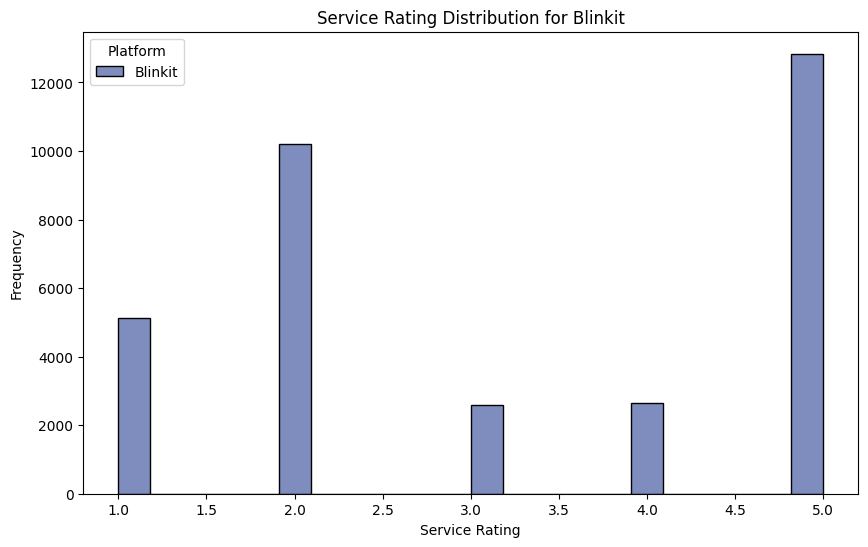

In [ ]:
platform_name = "Blinkit"
platform_data = df[df['Platform'] == platform_name]
plt.figure(figsize=(10, 6))
sns.histplot(x='Service Rating', hue='Platform', data=platform_data, palette='dark')
plt.title(f'Service Rating Distribution for {platform_name}')
plt.xlabel('Service Rating')
plt.ylabel('Frequency')
plt.show()


 **Bimodal Rating Pattern**:  
   - Similar to Swiggy Instamart, Blinkit's service ratings exhibit a **bimodal distribution**, with peaks at **2-star and 5-star ratings**.  

 **Highest Frequency at 5 Stars**:  
   - The most common rating is **5 stars**, with over **12,000 reviews**, suggesting a high level of customer satisfaction among a large segment of users.  

**Significant 2-Star Ratings**:  
   - Over **10,000 users rated Blinkit 2 stars**, indicating that a substantial portion of customers were dissatisfied with their experience.  

**Low Ratings for 3 and 4 Stars**:  
   - The number of **3-star and 4-star ratings is minimal**, suggesting that customers tend to either love or dislike the service, with fewer neutral opinions.  

**Insights:**

- A large number of **5-star ratings** suggests that **many customers are happy with Blinkit’s service**.  
- However, the **high number of 2-star ratings** may indicate **frequent issues** (such as delays, product quality, or customer service concerns).  
- The **lack of moderate ratings** could mean that customers have **polarized opinions**, likely influenced by inconsistent service experiences.  



# **Service Rating Distribution for JioMart**

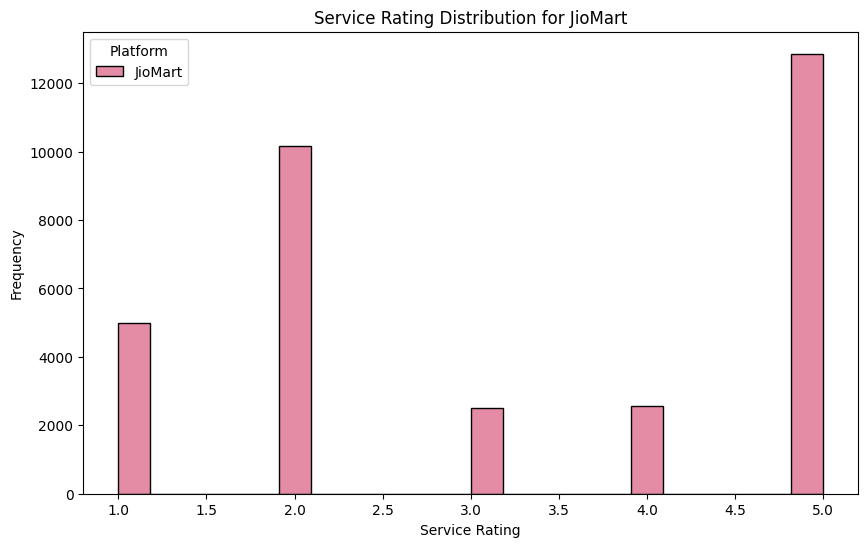

In [ ]:
platform_name = "JioMart"
platform_data = df[df['Platform'] == platform_name]
plt.figure(figsize=(10, 6))
sns.histplot(x='Service Rating', hue='Platform', data=platform_data, palette='rocket')
plt.title(f'Service Rating Distribution for {platform_name}')
plt.xlabel('Service Rating')
plt.ylabel('Frequency')
plt.show()

 **Bimodal Distribution**: There are two major peaks—one at **rating 2** and another at **rating 5**—indicating that customers either had a very poor or very good experience, with little middle ground.  

 **High Number of Low Ratings**: A significant number of ratings are **1 and 2 stars**, suggesting that many users are dissatisfied with JioMart’s service, possibly due to delivery delays or product issues.  


  **Strong Positive Sentiment**: Despite low ratings, the largest number of ratings is **5 stars**, indicating a loyal customer base that appreciates JioMart’s service when it meets expectations.  

 **Low Neutral Ratings**: The **3-star and 4-star ratings are relatively low**, meaning customers tend to have strong opinions—either very satisfied or very disappointed.  

 **Potential Improvement Areas**: Since low ratings are substantial, JioMart may need to address key pain points like **delivery efficiency, customer support, or product availability** to shift more ratings towards the positive end.  


# **Distribution of Orders Across Online Grocery Platforms**

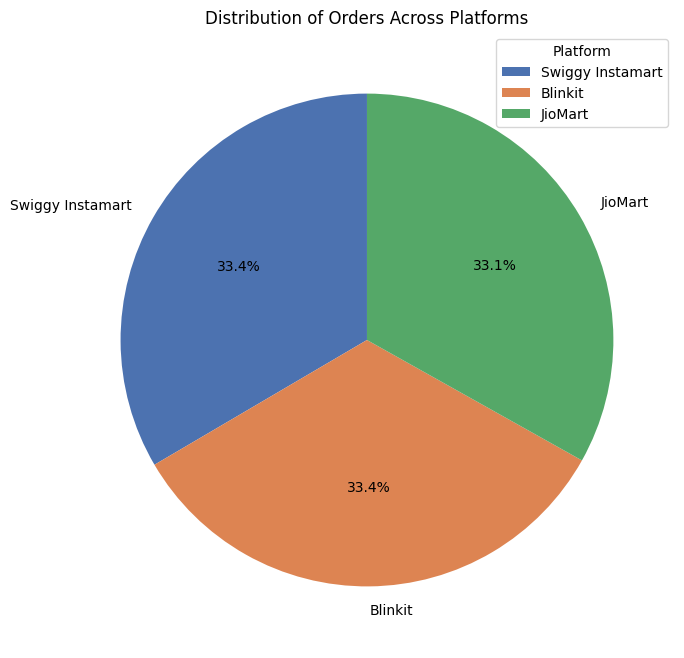

In [ ]:
# Prepare data for pie chart
platform_counts = df['Platform'].value_counts()
plt.figure(figsize=(8, 8))
plt.pie(platform_counts, labels=platform_counts.index, autopct='%1.1f%%', startangle=90, colors=sns.color_palette('deep'))
plt.title('Distribution of Orders Across Platforms')
plt.legend(platform_counts.index, title="Platform", loc="best")# Add a legend  and  'loc="best"' automatically finds the best position for the legend
plt.show()

 **Nearly Equal Market Share**  
   - The pie chart shows that the three platforms—Swiggy Instamart, Blinkit, and JioMart—have almost an equal share of total orders.  
   - Swiggy Instamart and Blinkit hold **33.4%** each, while JioMart is slightly behind at **33.1%**.  

 **Competitive Market**  
   - The close percentages suggest that no single platform is dominating the market.  
   - This indicates strong competition among the three services, with customers using all of them at nearly equal rates.  

 **JioMart Slightly Lower**  
   - Even though JioMart has a marginally lower share, the difference is minimal.  
   - This could mean that factors such as delivery speed, availability, or pricing might slightly favor Swiggy Instamart and Blinkit over JioMart.  
 **Balanced Consumer Preferences**  
   - The even distribution suggests that consumers don’t have a strong preference for one platform over the others.  
   - Instead, they might be choosing platforms based on situational factors such as offers, product availability, or personal convenience.  


The data highlights a highly competitive online grocery delivery market where Swiggy Instamart, Blinkit, and JioMart are nearly equally preferred by customers. This means that future growth for any platform would depend on offering better service, pricing strategies, and user experience to gain a competitive edge.

# **Distribution of Service Ratings - Key Insights**

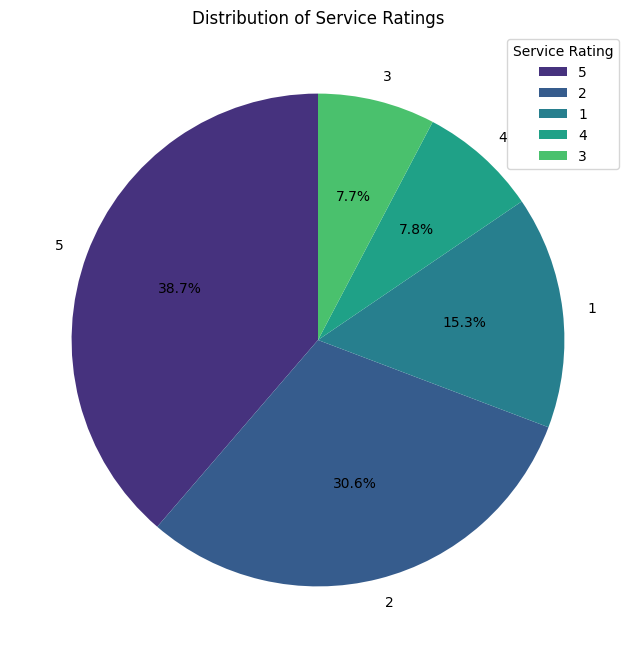

In [ ]:
rating_counts = df['Service Rating'].value_counts()
plt.figure(figsize=(8, 8))
plt.pie(rating_counts, labels=rating_counts.index, autopct='%1.1f%%', startangle=90, colors=sns.color_palette('viridis'))
plt.title('Distribution of Service Ratings')
plt.legend(rating_counts.index, title="Service Rating", loc="best")
plt.show()

 **Highest Rating (5 stars)** - The largest proportion of ratings (38.7%) are 5-star ratings, indicating a strong preference for excellent service.

 **Second Highest (2 stars)** - A significant portion (30.6%) of users rated the service as 2 stars, suggesting dissatisfaction from a notable segment.

 **Mixed Low Ratings** - Ratings of 1 star (15.3%), 3 stars (7.7%), and 4 stars (7.8%) are present, indicating a diverse range of opinions.

**Polarized Feedback** - The distribution suggests that while many customers had an excellent experience, a large portion were also quite dissatisfied.

#**Insights from Customer Feedback and Service Ratings Across Platforms**

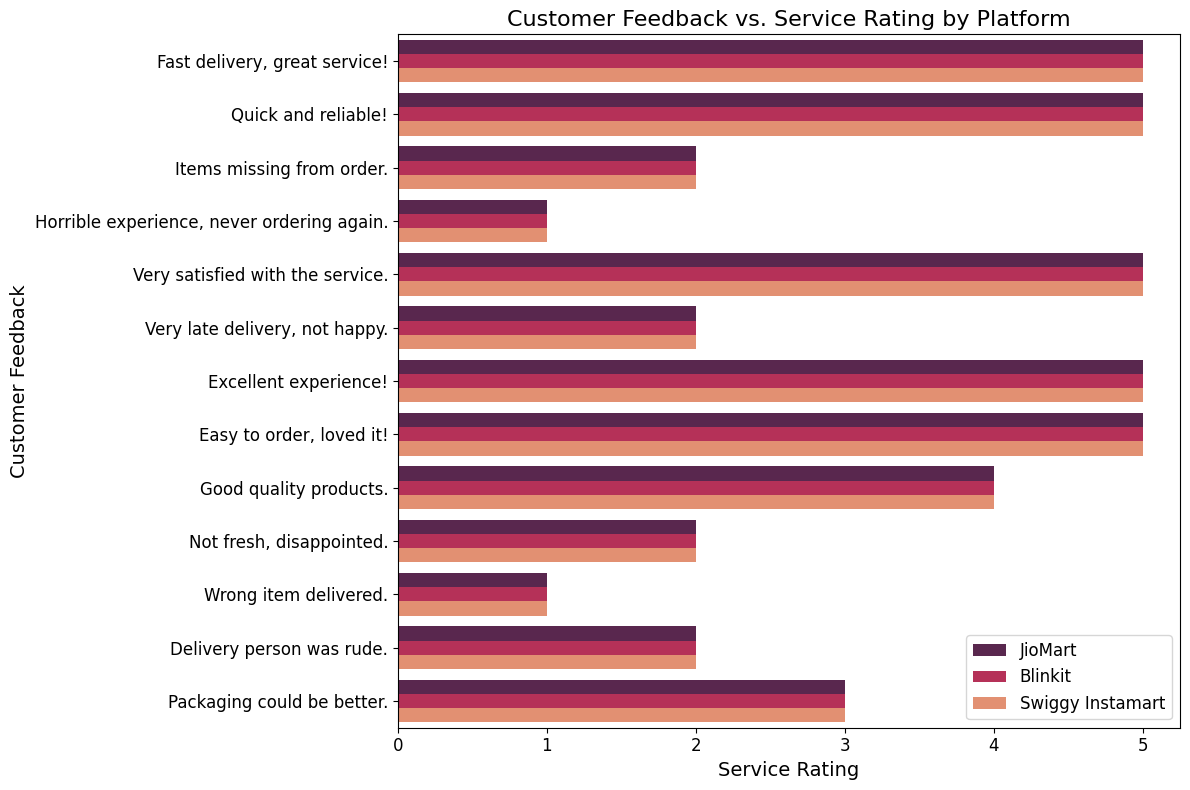

In [ ]:
plt.figure(figsize=(12, 8))  # Adjust the width and height as needed
ax = sns.barplot(y=df['Customer Feedback'], x=df['Service Rating'], hue=df['Platform'], palette='rocket')
ax.set_title('Customer Feedback vs. Service Rating by Platform', fontsize=16)  # Add title with fontsize
plt.xticks(fontsize=12)  # Adjust x-axis tick label size
plt.yticks(fontsize=12)  # Adjust y-axis tick label size
plt.xlabel("Service Rating", fontsize=14)  # Adjust x-axis label size
plt.ylabel("Customer Feedback", fontsize=14)  # Adjust y-axis label size
plt.legend(fontsize=12)  # Adjust legend fontsize
plt.tight_layout()  # Adjust layout to prevent overlapping elements
plt.show()

**High Ratings for Positive Feedback**  
   - Feedback such as **"Fast delivery, great service!"** and **"Excellent experience!"** are strongly associated with high ratings (4 & 5).  
   - Most satisfied customers are seen across all three platforms (JioMart, Blinkit, Swiggy Instamart).  

**Low Ratings for Negative Feedback**  
- Complaints like **"Wrong item delivered."**, **"Delivery person was rude.",** and **"Very late delivery, not happy."** have lower ratings (1 & 2).  
- Issues related to **delivery and product quality** tend to drive dissatisfaction.  

**Service Ratings are Consistent Across Platforms**  
   - All three platforms exhibit similar patterns in ratings, indicating **comparable customer sentiment trends**.  
   - However, the density of 5-star ratings suggests that positive experiences are more common.  

**Moderate Ratings for Improvement Areas**  
- Feedback like **"Packaging could be better."** and **"Good qualityproducts."** are linked with **mid-range ratings (3-4)**, suggesting customers appreciate quality but expect further improvements.  

**Insights for Business Strategy:**

**Maintain high service standards** for prompt delivery and quality products.  
**Improve areas like packaging and issue resolution** to push mid-range ratings to 5-star.  
 **Address frequent complaints (wrong items, rude delivery personnel)** to minimize 1-star and 2-star ratings.  
